## <font color='blue'>**Modelo epidemiológico básico para enfermedad infecciosa**</font>

### Suposiciones

1. La población inicial es de 1.000.000 habitantes sanos, en el día 0.

2. Una persona puede estar en alguno de los siguientes cinco estados:
    * Sano
    * Enfermo leve
    * Enfermo grave
    * Recuperado
    * Fallecido
    

3. Asociado a los estados anteriores podemos obtener las siguientes probabilidades de transición:
    * $s_l$, la probabilidad de pasar de estar sano a tener síntomas leves,
    * $l_g$, la probabilidad de pasar de tener síntomas leves a graves,
    * $l_r$, la probabilidad de pasar de tener síntomas leves a recuperarse,
    * $g_r$, la probabilidad de pasar de tener síntomas graves a recuperarse y
    * $g_f$, la probabilidad de pasar de tener síntomas graves, a fallecer.

Para cada día $n$, consideremos el vector:

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

que corresponde a los individuos sanos, los enfermos leves, enfermos graves, recuperados y fallecidos al día $n$.

Por ejemplo al día $0$ todos los individuos están sanos, así que $X(0)=(1000000,0,0,0,0)$.

Para la evolución entre los distintos estados de Markov, se realizan las siguientes **suposiciones**:

1. Paso de un estado a otro:
    * Alguien solo puede fallecer si se encuentra enfermo grave.
    * Si alguien es enfermo grave, tiene  $g_f$ probabilidad de pasar a ser fallecido, $g_r$ de recuperarse y por lo tanto  $(1-g_r-g_f)$ de quedarse enfermo grave
    * La enfermedad se contagia de persona a persona, y de un día a otro una persona tiene probabilidad $s_l$ de pasar de estar sana a tener síntomas leves. 
    * No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad $(1-s_l)$.
    * Si una persona tiene síntomas leves, tiene probabilidad $l_g$ de pasar a tener síntomas graves y $l_r$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-l_g-l_r)$ de quedarse con síntomas leves.     
    * Una persona que se recupera desarrolla inmunidad a la enfermedad, por lo que se queda en estado de recuperado.   
    * Una persona que fallece, se queda en ese estado.


Con estos números y suposiciones, podemos entender, en valor esperado, cómo será el vector de población
<br><br>
$$\mathbf{X}(n+1) = \begin{pmatrix}s(n+1), l(n+1), g(n+1), r(n+1), f(n+1)\end{pmatrix}$$
<br>
si sabemos cómo es el vector
<br><br>
$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$
<br>
Por ejemplo, podemos esperar que la cantidad de recuperados al día $n+1$ sea:
<br><br>
$$r(n+1) = l_r·l(n) + g_r·g(n) + 1·r(n)$$
<br>
pues de los de síntomas leves del día $n$ habrá una proporción $l_r$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción $g_r$ de ellos que se recuperen, y todos los recuperados del día $n$ se quedan recuperados. De esta forma, obtenemos el siguiente sistema de ecuaciones de lo que podemos esperar:
<br><br>
$$
\begin{align}
s(n+1)& = (1 - s_l)\times s(n) \\[0.4em]
l(n+1)& = s_l\times s(n)+(1-l_r-l_g)\times l(n) \\[0.4em]
g(n+1)& = l_g\times l(n)+(1-g_r-g_f)\times g(n) \\[0.4em]
r(n+1)& = l_r\times l(n)+g_r\times g(n)+1\times r(n) \\[0.4em]
f(n+1)& = g_f\times g(n)+1\times f(n)
\end{align}
$$
<br><br>
Este sistema de ecuaciones se puede escribir de una forma mucho más compacta. Si definimos la matriz:
<br><br>
$$\mathbf{A}=\begin{pmatrix} 1-s_l & 0 & 0 & 0 & 0 \\s_l & 1-l_r-l_g & 0 & 0 & 0 \\0 & l_g & 1-g_r-g_f & 0 & 0 \\ 0 & l_r & g_r & 1 & 0\\ 0 & 0 & g_f & 0 & 1 \end{pmatrix}$$
<br><br>
las ecuaciones anteriores se pueden abreviar simplemente a:
<br><br>
$$X(n+1)=AX(n)$$
<br>
De esta forma, si queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:
<br><br>
$$X(n)=A^n X(0)$$

# Cadena de Markov

Se tienen los siguientes valores para los parámetros del modelo: $s_l=0.20$, $l_g=0.15$, $l_r=0.25$, $g_r=0.15$ y $g_f=0.15$.

**Genera un algoritmo que retorne el estado de la poblacion al dia 20.
Grafique.**


In [10]:
import numpy as np
import matplotlib.pyplot as plt

sl = 0.20
lg = 0.15
lr = 0.25
gr = 0.15
gf = 0.15

x = np.array([[1000000], [0], [0], [0], [0]])
A = np.array([[1 - sl, 0, 0, 0, 0], [sl, 1 - lr - lg, 0, 0, 0], [0, lg, 1 - gr - gf, 0, 0], [0, lr, gr, 1, 0],
             [0, 0, gf, 0, 1]])

In [11]:
x

array([[1000000],
       [      0],
       [      0],
       [      0],
       [      0]])

In [12]:
A

array([[0.8 , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  , 0.  ],
       [0.  , 0.15, 0.7 , 0.  , 0.  ],
       [0.  , 0.25, 0.15, 1.  , 0.  ],
       [0.  , 0.  , 0.15, 0.  , 1.  ]])

In [13]:
def vector_poblacion(dias):
    sl = 0.20
    lg = 0.15
    lr = 0.25
    gr = 0.15
    gf = 0.15

    x = np.array([[1000000], [0], [0], [0], [0]])
    A = np.array([[1 - sl, 0, 0, 0, 0], [sl, 1 - lr - lg, 0, 0, 0], [0, lg, 1 - gr - gf, 0, 0], [0, lr, gr, 1, 0],
                 [0, 0, gf, 0, 1]])
    
    sanos = [1000000]
    leves = [0]
    graves = [0]
    recuperados = [0]
    fallecidos = [0]
    
    for i in range (1, dias + 1):
        x = np.dot(A, x)
        poblacion = [int(elem) for elem in x]
        sanos.append(poblacion[0])
        leves.append(poblacion[1])
        graves.append(poblacion[2])
        recuperados.append(poblacion[3])
        fallecidos.append(poblacion[4])

    plt.figure()
    plt.plot(sanos, c='green')
    plt.plot(leves, c='orange')
    plt.plot(graves, c='red')
    plt.plot(recuperados, c='blue')
    plt.plot(fallecidos, c='gray')
    plt.legend(['sanos', 'leves', 'graves', 'recuperados', 'fallecidos'])
    plt.xlabel('dias')
    plt.ylabel('numero de personas')
    plt.title(f'N = {dias}')
    
    return [int(elem) for elem in x]

[14, 14, 21, 812466, 187483]

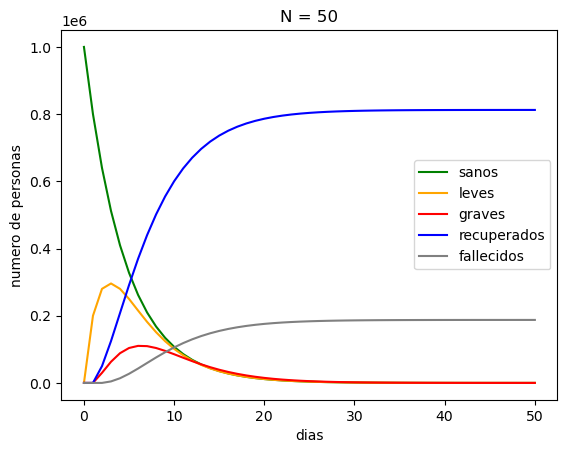

In [15]:
vector_poblacion(50)